In [2]:
import torch
import numpy as np
import pandas as pd

In [3]:
df= pd.read_csv('/users/fara/ML_Repository/NeuralNetworks/PyTorch/titanic/train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df['gender']= df['Sex'].map({'male':1, 'female':0})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  gender       891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [6]:
feats= ['Pclass', 'gender', 'Age', 'Fare', 'Survived']

df_train= df[feats]

In [7]:
df_train

,Pclass,gender,Age,Fare,Survived
0,3,1,22.0,7.2500,0
1,1,0,38.0,71.2833,1
2,3,0,26.0,7.9250,1
3,1,0,35.0,53.1000,1
4,3,1,35.0,8.0500,0
...,...,...,...,...,...
886,2,1,27.0,13.0000,0
887,1,0,19.0,30.0000,1
888,3,0,NaN,23.4500,0
889,1,1,26.0,30.0000,1


In [8]:
df_train=df_train.dropna()
print(df_train.isna().sum().sum())

0


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    714 non-null    int64  
 1   gender    714 non-null    int64  
 2   Age       714 non-null    float64
 3   Fare      714 non-null    float64
 4   Survived  714 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 33.5 KB


In [10]:
df_train.head()

,Pclass,gender,Age,Fare,Survived
0,3,1,22.0,7.2500,0
1,1,0,38.0,71.2833,1
2,3,0,26.0,7.9250,1
3,1,0,35.0,53.1000,1
4,3,1,35.0,8.0500,0


In [11]:
target= df_train[['Survived']]

In [12]:
df_train= df_train.drop(columns= ['Survived'])

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  714 non-null    int64  
 1   gender  714 non-null    int64  
 2   Age     714 non-null    float64
 3   Fare    714 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 27.9 KB


In [14]:
df_train=pd.get_dummies(df_train, columns=['Pclass'], dtype=int)

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    714 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      714 non-null    float64
 3   Pclass_1  714 non-null    int64  
 4   Pclass_2  714 non-null    int64  
 5   Pclass_3  714 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 39.0 KB


In [16]:
target.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [17]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(df_train, target, test_size=0.2, random_state=0 )

In [18]:
x_train.shape, y_train.shape

((571, 6), (571, 1))

In [19]:
x_test.shape, y_test.shape

((143, 6), (143, 1))

In [20]:
Xtrain_= torch.from_numpy(x_train.values).float()
Xtest_= torch.from_numpy(x_test.values).float()


#Loss function is NLLLoss(). reshaping Y to match the format that our loss function requires
Ytrain_= torch.from_numpy(y_train.values).view(1,-1)[0]
Ytest_= torch.from_numpy(y_test.values).view(1,-1)[0]

In [21]:
Xtrain_.shape, Ytrain_.shape, Xtest_.shape, Ytest_.shape

(torch.Size([571, 6]),
 torch.Size([571]),
 torch.Size([143, 6]),
 torch.Size([143]))

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [23]:
inp = 6
out = 2
hid = 10 #10 neurons-- hyerparameter

In [24]:
class Net(nn.Module): #calling parent class nn.module

    def __init__(self): #constructor of Net class
        super(Net,self).__init__()
        #instantiating 3 fullu connected layers
        self.fc1= nn.Linear(inp, hid)
        self.fc2=nn.Linear(hid, hid)
        self.fc3=nn.Linear(hid,out)
        
#forward pass implementation
    
    def forward(self, x): #overrriding forward fucntion in base nn.module class
        
        x= F.sigmoid(self.fc1(x))
        x= F.sigmoid(self.fc2(x))
        x= self.fc3(x)

        return F.log_softmax(x,dim=-1) # output of 3rd layer passed to log softmax function.
        

In [25]:
model= Net() #instantiating model of this network by calling net class

In [26]:
#we dont manually update weights during backpropagation, instead we use 
#Adam optimizer-- Adaptive Learning Rate optimizer which works very well in NN, after every epoch it updates weights

import torch.optim as optim
optimizer=optim.Adam(model.parameters())

#Setting up loss function

loss_fn= nn.NLLLoss()

In [27]:
#Now we are ready to start training

epoch_data=[]
epochs=1001



In [28]:
for epoch in range(1,epochs):
    
    optimizer.zero_grad() # for every epoch we zero out gradients so it calculates fresh gradients in the next epoch
    
    y_pred= model(Xtrain_)

#performing backward pass

    loss=loss_fn(y_pred,Ytrain_)
    loss.backward() # to calculate gradients

#once gradients are calculated we update model parameters
    optimizer.step()

#for every epoch we check how out model performs on test data, 
#we dont call backward() on test data as weights are not updated based on test data

    ypred_test= model(Xtest_)
    loss_test= loss_fn(ypred_test, Ytest_)

# when we perform classification predicted output is in the form of probabilities.
#actual predicted labels is the one with highest probability

    _,pred= ypred_test.data.max(1)

    accuracy= pred.eq(Ytest_.data).sum().item()/y_test.values.size
    epoch_data.append([epoch, loss.data.item(), loss_test.data.item(), accuracy])


# for every 100 epochs we print out accuracy and loss
    if epoch%100==0:
        print('epoch- %d (%d%%) train loss- %.2f test_loss- %.2f accuracy - %.4f' \
             %(epoch, epoch/150*10, loss.data.item(), loss_test.data.item(), accuracy))

epoch- 100 (6%) train loss- 0.64 test_loss- 0.66 accuracy - 0.5524
epoch- 200 (13%) train loss- 0.61 test_loss- 0.61 accuracy - 0.6783
epoch- 300 (20%) train loss- 0.58 test_loss- 0.58 accuracy - 0.6853
epoch- 400 (26%) train loss- 0.54 test_loss- 0.53 accuracy - 0.7343
epoch- 500 (33%) train loss- 0.47 test_loss- 0.45 accuracy - 0.8322
epoch- 600 (40%) train loss- 0.43 test_loss- 0.41 accuracy - 0.7972
epoch- 700 (46%) train loss- 0.42 test_loss- 0.41 accuracy - 0.8182
epoch- 800 (53%) train loss- 0.41 test_loss- 0.41 accuracy - 0.8112
epoch- 900 (60%) train loss- 0.40 test_loss- 0.42 accuracy - 0.8112
epoch- 1000 (66%) train loss- 0.39 test_loss- 0.43 accuracy - 0.8112


In [57]:
#plotting Accuracy and Loss Metrics

df_epochs_data= pd.DataFrame(epoch_data, columns=['epoch', 'train_loss', 'test_loss', 'accuracy'])
                                                

In [59]:
import matplotlib.pyplot as plt

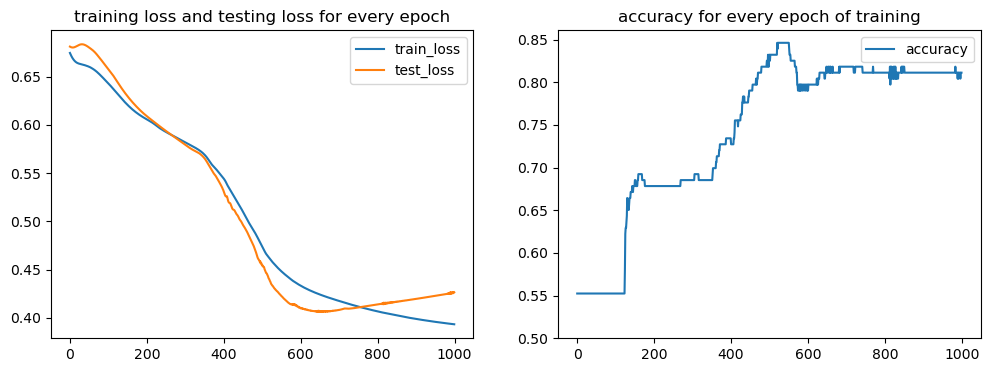

In [75]:
f, (ax1,ax2)= plt.subplots(1, 2, figsize=(12,4))

df_epochs_data[['train_loss', 'test_loss']].plot(ax=ax1)
ax1.set_title ("training loss and testing loss for every epoch")

df_epochs_data[['accuracy']].plot(ax=ax2) 
ax2.set_title("accuracy for every epoch of training")

plt.ylim(ymin=0.5)

plt.show()